In [26]:
pip install tensorflow


     -------------------------------------- 455.9/455.9 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 8.0 MB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 10.1 MB/s eta 0:00:00
     -------------------------------------- 895.7/895.7 kB 9.4 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 8.6 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 8.6 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 9.7 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB ? eta 0:00:00
     -------------------------------------- 438.7/438.7 kB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 9.4 


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
#data collection
import pandas_datareader as pdr
key="013ec1061a19d8f3a96370680762f683d071362c"

In [5]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

C:\Users\Dell\AppData\Local\Temp\ipykernel_12376\1593133401.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [6]:
df.to_csv('AAPL.csv')

In [7]:
import pandas as pd

In [8]:
df=pd.read_csv('AAPL.csv')

In [9]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-11-06 00:00:00+00:00,174.25,174.990,171.72,172.365,34242566,41.341395,41.516962,40.741144,40.894172,136970264,0.00,1.0
1,AAPL,2017-11-07 00:00:00+00:00,174.81,175.250,173.60,173.910,23910914,41.474257,41.578648,41.187180,41.260729,95643656,0.00,1.0
2,AAPL,2017-11-08 00:00:00+00:00,176.24,176.240,174.33,174.660,23907639,41.813529,41.813529,41.360375,41.438669,95630556,0.00,1.0
3,AAPL,2017-11-09 00:00:00+00:00,175.88,176.095,173.14,175.110,28636531,41.728118,41.779127,41.078044,41.545433,114546124,0.00,1.0
4,AAPL,2017-11-10 00:00:00+00:00,174.67,175.380,174.27,175.110,25061183,41.590511,41.759568,41.495267,41.695279,100244732,0.63,1.0


In [10]:
df1=df.reset_index()['close']

In [11]:
df1


0       174.25
1       174.81
2       176.24
3       175.88
4       174.67
         ...  
1252    144.80
1253    155.74
1254    153.34
1255    150.65
1256    145.03
Name: close, Length: 1257, dtype: float64

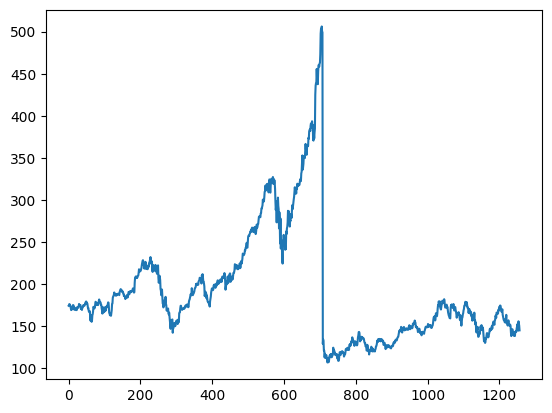

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [13]:
import numpy as np

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
df1

array([[0.16884158],
       [0.17024421],
       [0.17382592],
       ...,
       [0.11646838],
       [0.10973075],
       [0.09565435]])

In [16]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(817, 440)

In [18]:
import numpy
#array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [21]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [24]:
#reshape input to be [samples, time steps, features] for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [27]:
#Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train,y_train,model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 18s 643ms/step - loss: 0.0510 - val_loss: 0.0074
Epoch 2/100
12/12 [==============================] - 4s 322ms/step - loss: 0.0191 - val_loss: 0.0061
Epoch 3/100
12/12 [==============================] - 4s 354ms/step - loss: 0.0144 - val_loss: 6.2518e-04
Epoch 4/100
12/12 [==============================] - 4s 373ms/step - loss: 0.0111 - val_loss: 0.0019
Epoch 5/100
12/12 [==============================] - 5s 374ms/step - loss: 0.0096 - val_loss: 4.7052e-04
Epoch 6/100
12/12 [==============================] - 4s 363ms/step - loss: 0.0083 - val_loss: 2.9524e-04
Epoch 7/100
12/12 [==============================] - 7s 565ms/step - loss: 0.0078 - val_loss: 5.3104e-04
Epoch 8/100
12/12 [==============================] - 4s 341ms/step - loss: 0.0069 - val_loss: 3.5754e-04
Epoch 9/100
12/12 [==============================] - 5s 454ms/step - loss: 0.0064 - val_loss: 0.0012
Epoch 10/100
12/12 [==============================] - 5s 434ms/step - 

In [31]:
import tensorflow as tf

In [33]:
#prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 99ms/step


In [34]:
#transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [35]:
#calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

243.92581091212733

In [36]:
#test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

172.3646580586607

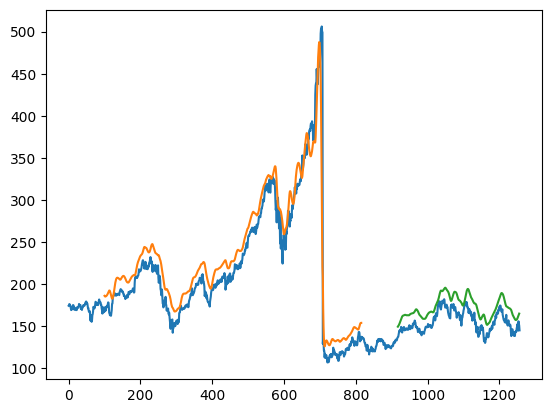

In [37]:
#Plotting 
#shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

#shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
len(test_data)

440

In [39]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [40]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [41]:
temp_input

[0.06492172824045078,
 0.07160926737633061,
 0.05815904821540385,
 0.061916092673763246,
 0.0727113337507827,
 0.07140889167188474,
 0.07872260488415778,
 0.08721352536005006,
 0.08721352536005006,
 0.07664370695053219,
 0.08112711333750777,
 0.07484032561051968,
 0.08037570444583592,
 0.08696305572949276,
 0.09036944270507191,
 0.09896055103318718,
 0.10068879148403248,
 0.09525360050093923,
 0.0977332498434565,
 0.09680651221039449,
 0.10427050720100184,
 0.10852849092047584,
 0.1007639323731997,
 0.11060738885410137,
 0.11571696931747022,
 0.12150281778334371,
 0.1183469004383218,
 0.11549154664996863,
 0.11211020663744514,
 0.12510958046336873,
 0.12651221039448962,
 0.139436443331246,
 0.13693174702567307,
 0.13317470256731367,
 0.1485034439574201,
 0.1477019411396368,
 0.14654978083907322,
 0.1453475266123982,
 0.14547276142767684,
 0.15629304946775202,
 0.1544145272385723,
 0.16345648090169063,
 0.16618659987476514,
 0.16578584846587346,
 0.1695929868503444,
 0.1685911083281152,

In [44]:
#prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
       
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
       
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.07160927 0.05815905 0.06191609 0.07271133 0.07140889 0.0787226
 0.08721353 0.08721353 0.07664371 0.08112711 0.07484033 0.0803757
 0.08696306 0.09036944 0.09896055 0.10068879 0.0952536  0.09773325
 0.09680651 0.10427051 0.10852849 0.10076393 0.11060739 0.11571697
 0.12150282 0.1183469  0.11549155 0.11211021 0.12510958 0.12651221
 0.13943644 0.13693175 0.1331747  0.14850344 0.14770194 0.14654978
 0.14534753 0.14547276 0.15629305 0.15441453 0.16345648 0.1661866
 0.16578585 0.16959299 0.16859111 0.16200376 0.15211021 0.15125861
 0.15201002 0.15827176 0.14221666 0.13660614 0.13041954 0.1261866
 0.12804008 0.12265498 0.11944897 0.12303068 0.11927364 0.1265623
 0.14174076 0.11772073 0.12140263 0.11403882 0.10985598 0.11932373
 0.1253851  0.11742016 0.11496556 0.10917971 0.11003131 0.11251096
 0.10770194 0.08926738 0.07854728 0.08919224 0.09833438 0.09908579
 0.09665623 0.08328115 0.0841077  0.08050094 0.07889793 0.09054477
 0.07899812 0.08909205 0.09244834 0.09272386 0.09154665

In [45]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [46]:
import matplotlib.pyplot as plt

In [47]:
len(df1)

1257

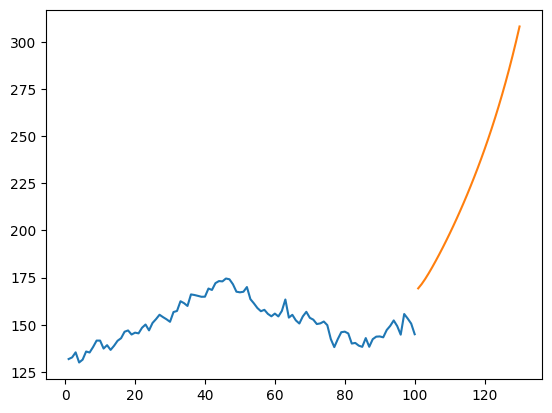

In [56]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [57]:
df3=scaler.inverse_transform(df3).tolist()

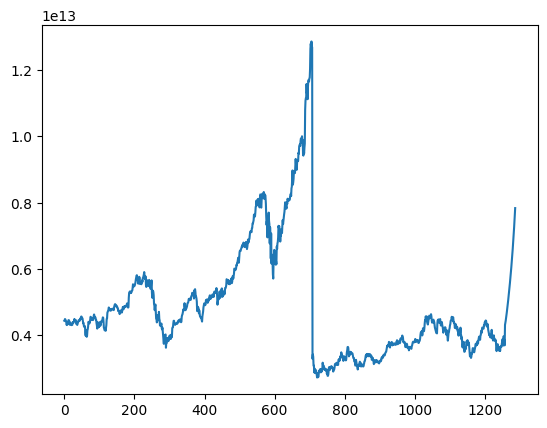

In [59]:
plt.plot(df3)